#1. Import Basic Libraries

In [1]:
# ========== 1. Import Required Libraries ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2. Set Visualization Style

In [2]:
# ========== 2. Set Visualixzation Style ==========
sns.set(style="whitegrid")

#3. Load the Dataset from CSV file

In [3]:
# ========== 3. Load Dataset ==========
df = pd.read_csv("KaggleV2-May-2016.csv")
print("Dataset Loaded. Shape:", df.shape)

Dataset Loaded. Shape: (110527, 14)


#4. Dataset Overview

In [4]:
# ========== 4. Dataset Overview ==========
print("\n--- First 5 Rows ---\n", df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Unique Values per Column ---\n", df.nunique())


--- First 5 Rows ---
       PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0    

#5. Data Preprocessing

In [5]:
# ========== 5. Data Preprocessing ==========

# Check missing values
print("\nMissing Values:", df.isnull().sum().sum())

# Convert date columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Rename columns
df.rename(columns={
    'No-show': 'No_show',
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap'
}, inplace=True)

# Check the dataset
print(df.info())


Missing Values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              


#6. Exploratory Data Analysis (EDA)

#6.1 No_Show Class Balance

No_show
No     79.806744
Yes    20.193256
Name: proportion, dtype: float64


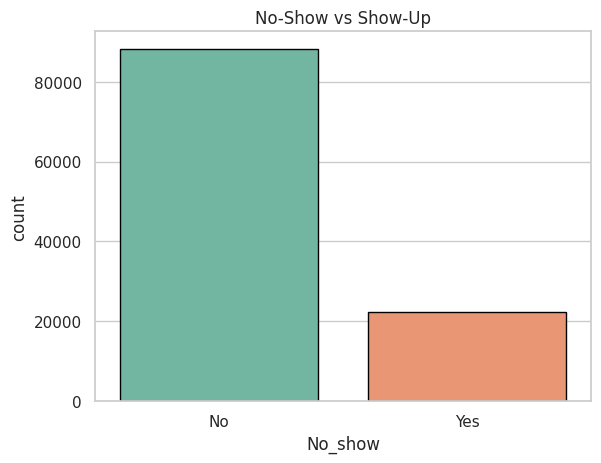

In [11]:
# No-show rate
no_show_rate = df['No_show'].value_counts(normalize=True) * 100
print(no_show_rate)

# Visualize no-show rate
sns.countplot(x='No_show', data=df, palette='Set2', hue='No_show', legend=False, edgecolor='black')
plt.title('No-Show vs Show-Up')
plt.show()

#6.2 Gender Distribution for No_show rate

Gender
F    64.997693
M    35.002307
Name: proportion, dtype: float64
Gender  No_show
F       No         79.685412
        Yes        20.314588
M       No         80.032052
        Yes        19.967948
Name: proportion, dtype: float64


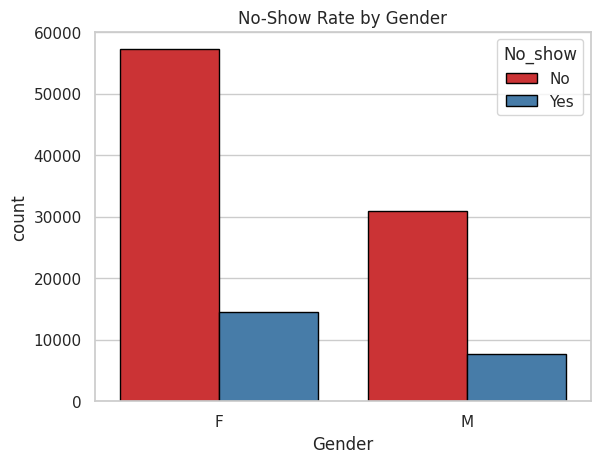

In [12]:
# Gender distribution
gender_distribution = df['Gender'].value_counts(normalize=True) * 100
print(gender_distribution)

# No-show rate by gender
no_show_by_gender = df.groupby('Gender')['No_show'].value_counts(normalize=True) * 100
print(no_show_by_gender)

# Visualize no-show rate by gender
sns.countplot(x='Gender', hue='No_show', data=df, palette='Set1', legend=True, edgecolor='black')
plt.title('No-Show Rate by Gender')
plt.show()

#6.3 Age Distribution Plot

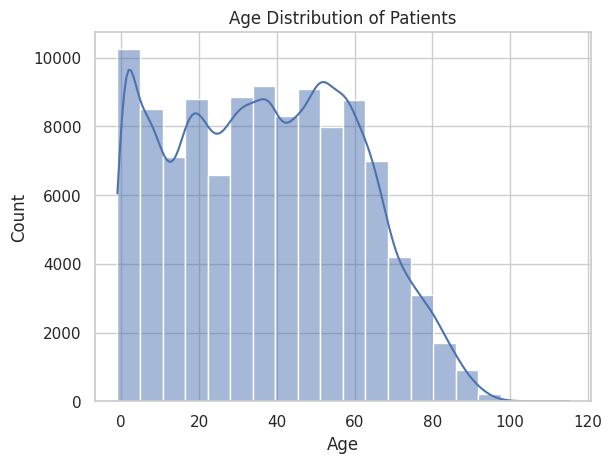

In [8]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.show()

#6.4 Age Distribution for No_show rate

No_show          No        Yes
AgeGroup                      
0-18      77.462787  22.537213
19-35     76.165224  23.834776
36-50     79.674208  20.325792
51-65     83.450863  16.549137
66+       84.481721  15.518279


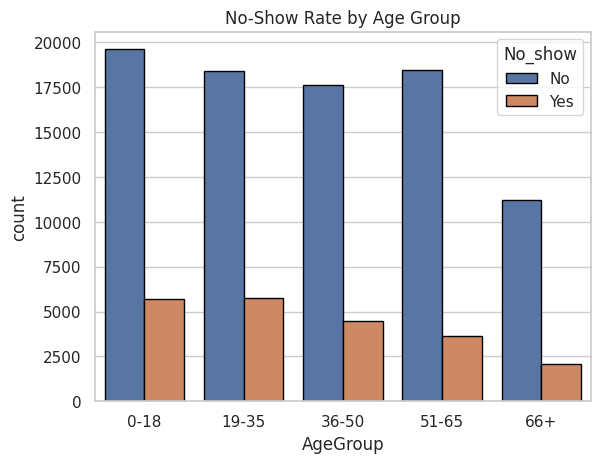

In [13]:
# No-show rate by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])

no_show_by_age = (
    df.groupby('AgeGroup', observed=True)['No_show']
    .value_counts(normalize=True)
    .unstack()
    * 100
)

print(no_show_by_age)

# Visualize no-show rate by age group
sns.countplot(x='AgeGroup', hue='No_show', data=df, edgecolor='black')
plt.title('No-Show Rate by Age Group')
plt.show()

#6.5 Top 10 Neighbourhood for appointments

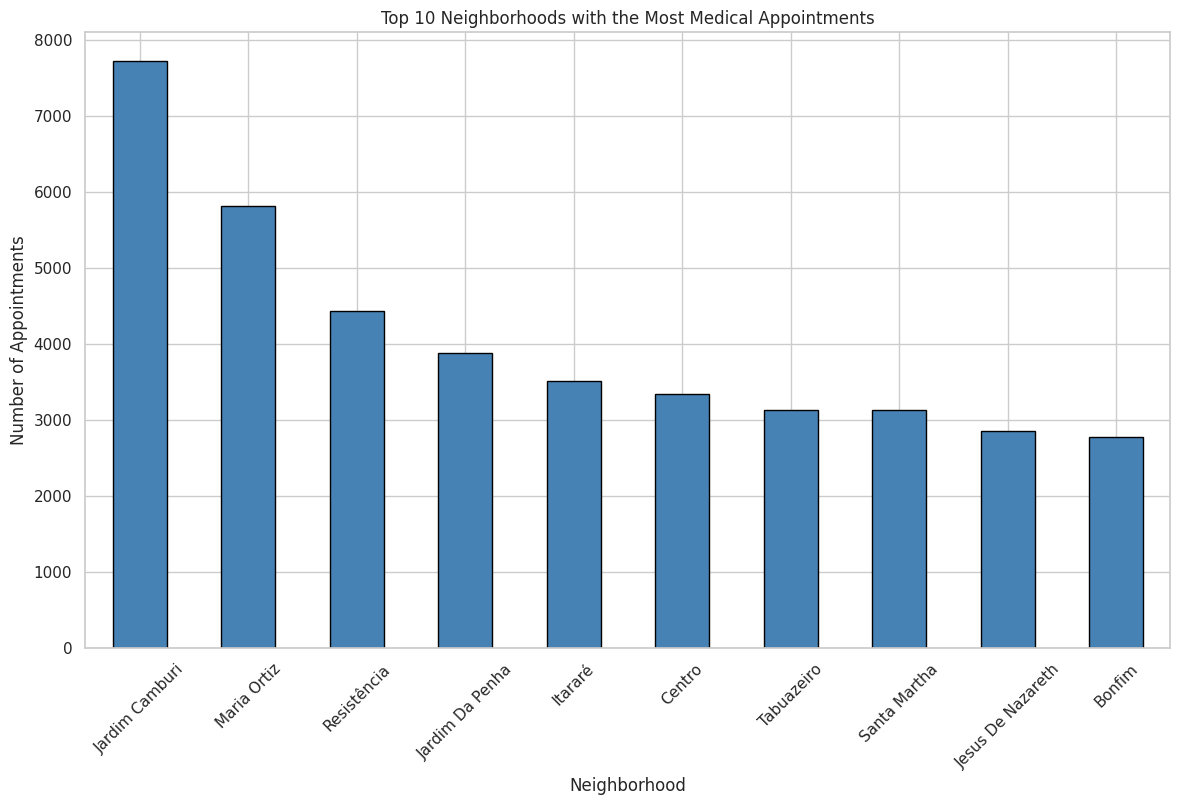

In [14]:
plt.figure(figsize=(14, 8))
neighborhood_counts = df['Neighbourhood'].value_counts().head(10)
neighborhood_counts.index = neighborhood_counts.index.str.title()
neighborhood_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.tight_layout
plt.title("Top 10 Neighborhoods with the Most Medical Appointments")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.show()

#6.6 Appointment Dates Distribution

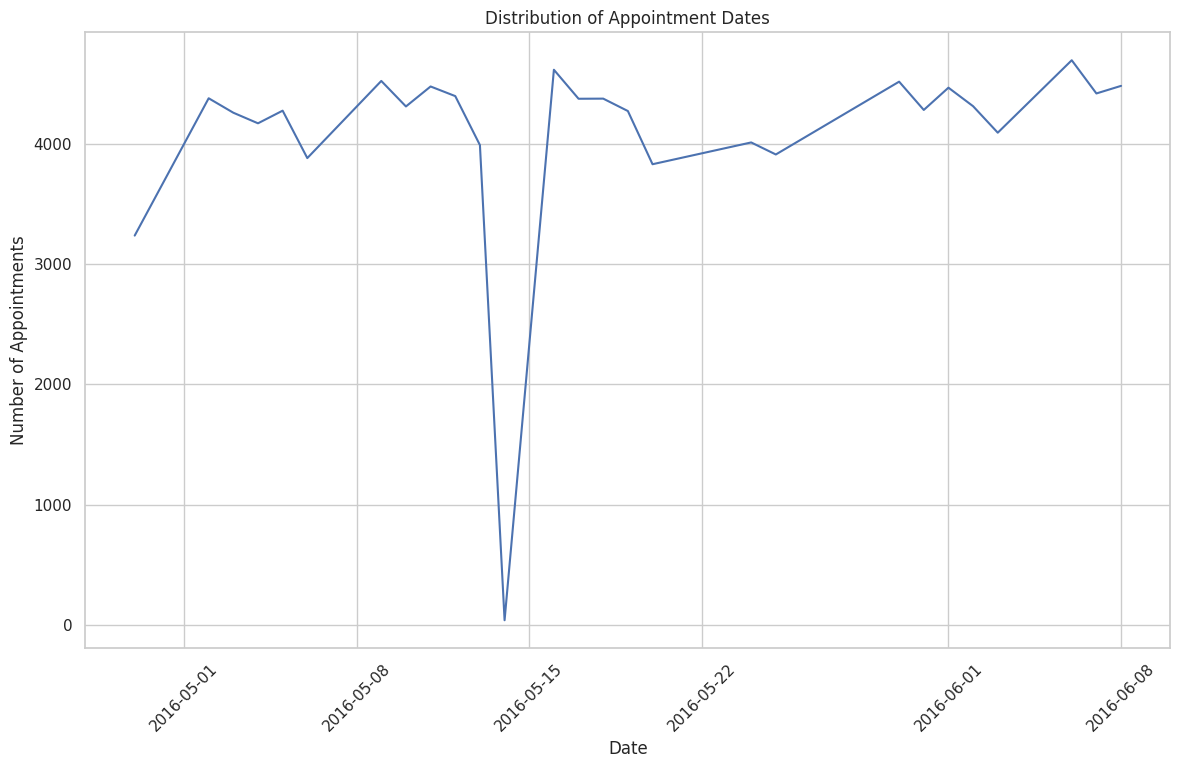

In [15]:
# Distribution of appointment dates
plt.figure(figsize=(14, 8))
df['AppointmentDay'].dt.date.value_counts().sort_index().plot()
plt.title("Distribution of Appointment Dates")
plt.xlabel("Date")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.show()

#6.7 How often appointments are scheduled in advanced?

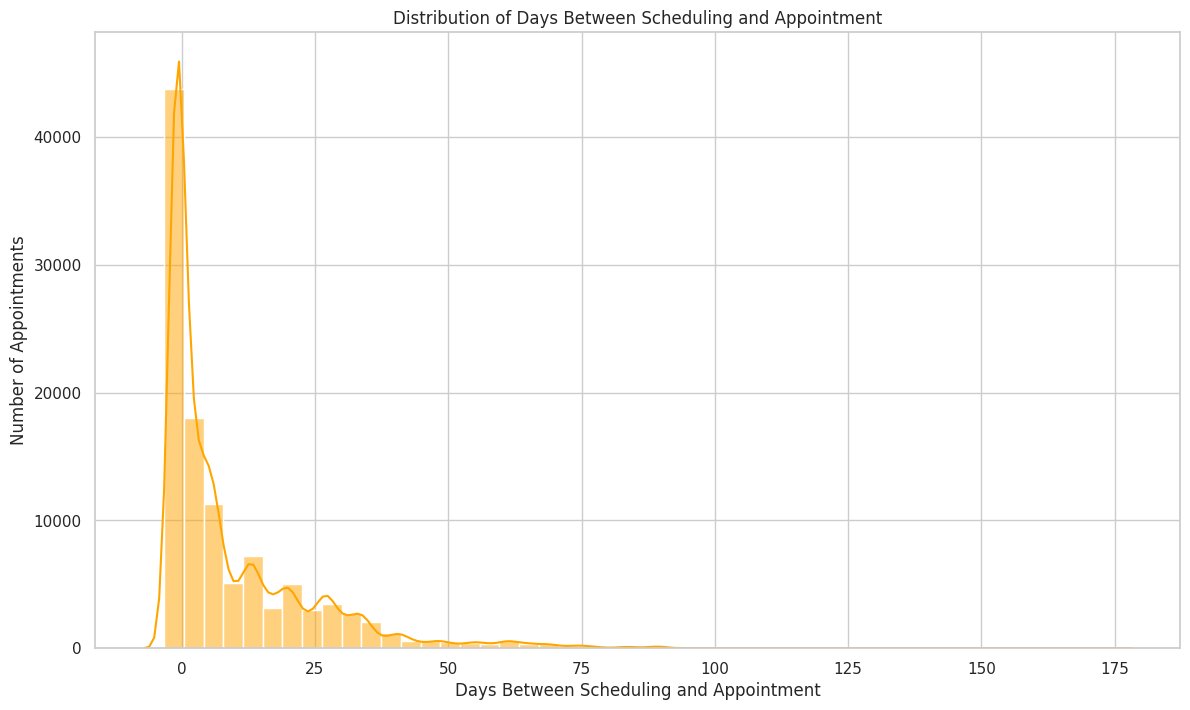

In [16]:
# apoointments scheduled in advanced
df['Days_Between'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
plt.figure(figsize=(14, 8))
sns.histplot(df['Days_Between'], bins=50, kde=True, color='orange')
plt.title("Distribution of Days Between Scheduling and Appointment")
plt.xlabel("Days Between Scheduling and Appointment")
plt.ylabel("Number of Appointments")
plt.show()

#6.8 No_show rate distribution based on advanced appointment scheduling

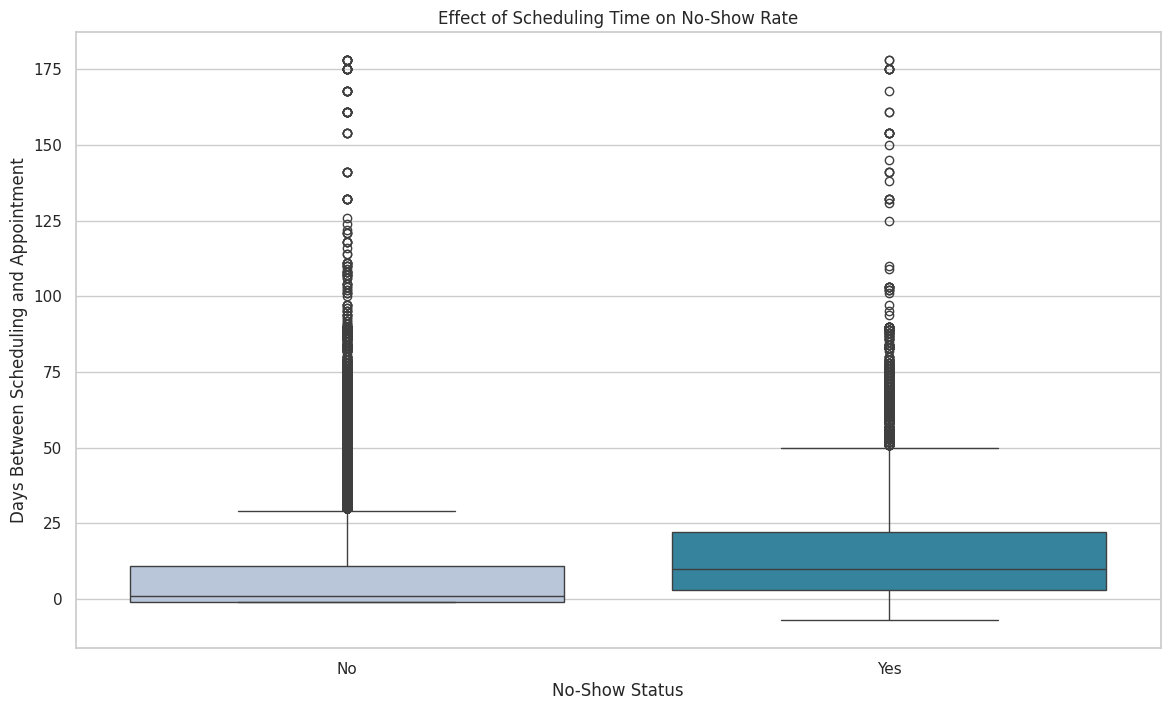

In [17]:
# no_show rate based on advanced appointment scheduling
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['No_show'], y=df['Days_Between'], palette="PuBuGn", hue=df['No_show'], legend=False)
plt.title("Effect of Scheduling Time on No-Show Rate")
plt.xlabel("No-Show Status")
plt.ylabel("Days Between Scheduling and Appointment")
plt.show()

#6.9 No_show rate based on weekday

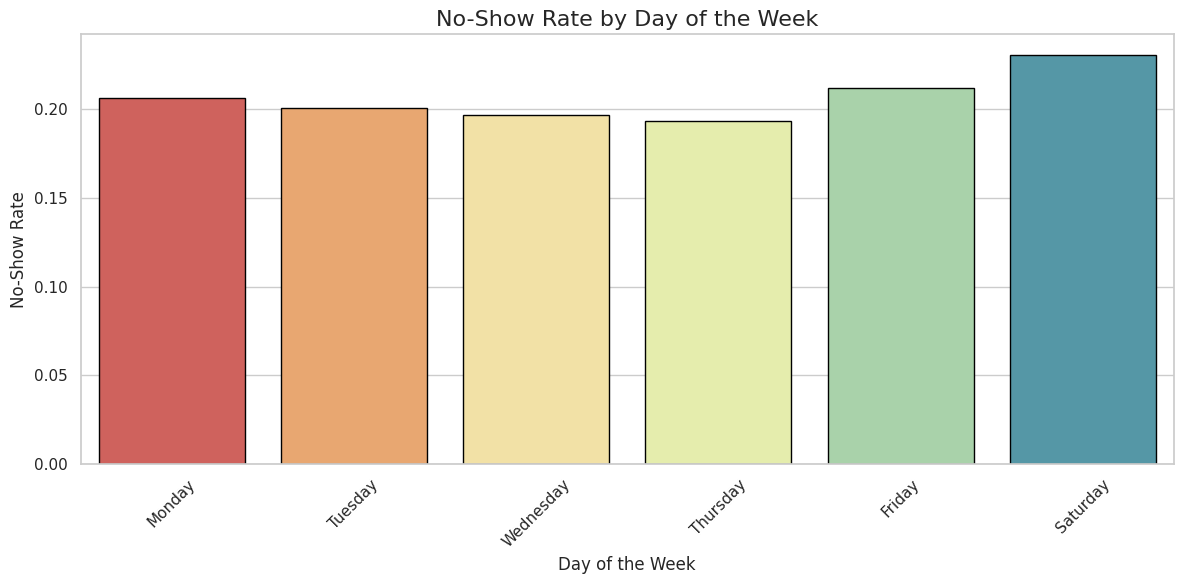

In [18]:
# Convert 'No_show' column to binary (1 for Yes, 0 for No)
df['No_show'] = df['No_show'].map({'Yes': 1, 'No': 0})

# Extract weekday names from 'AppointmentDay'
df['Appointment_Weekday'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

# Group by weekday and calculate average no-show rate
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
no_show_by_day = df.groupby('Appointment_Weekday')['No_show'].mean().reindex(weekday_order).reset_index()

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=no_show_by_day,
    x='Appointment_Weekday',
    y='No_show',
    palette="Spectral", legend=False, hue='Appointment_Weekday', edgecolor='black'
)
plt.title("No-Show Rate by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("No-Show Rate", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#6.10 No_show rate based on patient scholarship

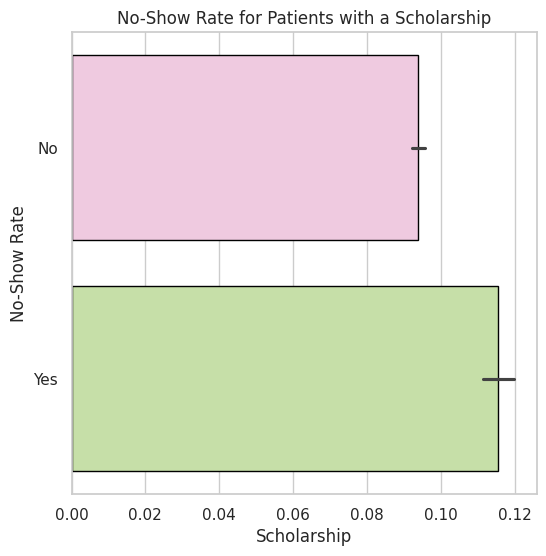

In [19]:
# Convert 'No_show' column to categorical (1 for Yes, 0 for No)
df['No_show'] = df['No_show'].map({1: 'Yes', 0: 'No'})

# No_show rate based on patient scholarship
plt.figure(figsize=(6, 6))
sns.barplot(x=df['Scholarship'], y=df['No_show'], palette="PiYG", legend=False, hue=df['No_show'], edgecolor='black')
plt.title("No-Show Rate for Patients with a Scholarship")
plt.xlabel("Scholarship")
plt.ylabel("No-Show Rate")
plt.show()

#6.11 No-show rate for patients with hypertension or diabetes

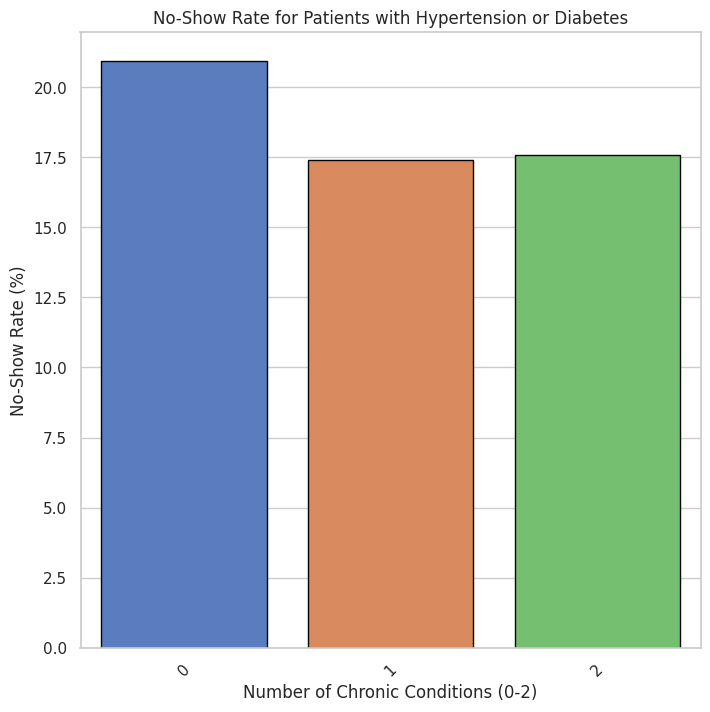

In [20]:
# No-show rate for patients with hypertension or diabetes

# Convert 'No_show' to numeric (1 for 'Yes', 0 for 'No')
df['No_show'] = df['No_show'].map({'Yes': 1, 'No': 0})

# Create a new column for the number of chronic conditions (Hypertension or Diabetes)
df['NumChronicConditions'] = df[['Hypertension', 'Diabetes']].sum(axis=1)

# Group by the number of chronic conditions and calculate the no-show rate
no_show_by_chronic = df.groupby('NumChronicConditions')['No_show'].mean() * 100

# Reset index for plotting
no_show_by_chronic = no_show_by_chronic.reset_index()

# Plot the no-show rate
plt.figure(figsize=(8, 8))
sns.barplot(x='NumChronicConditions', y='No_show', data=no_show_by_chronic, palette="muted", hue='NumChronicConditions', legend=False, edgecolor='black')
plt.xticks(rotation=45)
plt.title("No-Show Rate for Patients with Hypertension or Diabetes")
plt.xlabel("Number of Chronic Conditions (0-2)")
plt.ylabel("No-Show Rate (%)")
plt.show()

#6.12 No-show rate for patients with alcoholism

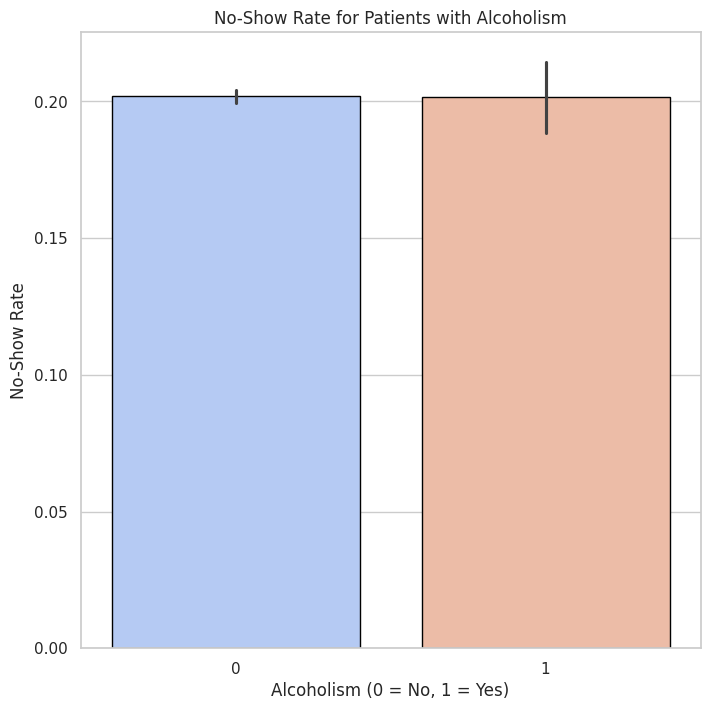

In [21]:
# no-show rate for patients with alcoholism
plt.figure(figsize=(8, 8))
sns.barplot(x=df['Alcoholism'], y=df['No_show'], palette="coolwarm", legend=False, hue=df['Alcoholism'], edgecolor='black')
plt.title("No-Show Rate for Patients with Alcoholism")
plt.xlabel("Alcoholism (0 = No, 1 = Yes)")
plt.ylabel("No-Show Rate")
plt.show()

#6.13 No-show rate by handicap status

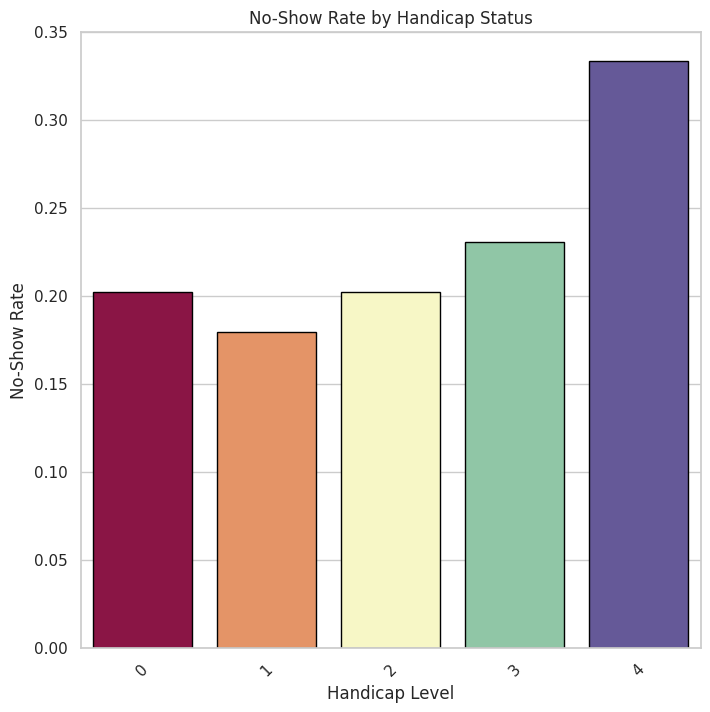

In [22]:
# no-show rate by handicap status
plt.figure(figsize=(8, 8))
sns.barplot(x=df['Handicap'], y=df['No_show'], palette="Spectral", errorbar=None, edgecolor='black', hue=df['Handicap'], legend=False)
plt.xticks(rotation=45)
plt.title("No-Show Rate by Handicap Status")
plt.xlabel("Handicap Level")
plt.ylabel("No-Show Rate")
plt.show()

#6.14 SMS reminder impact on No_show rate

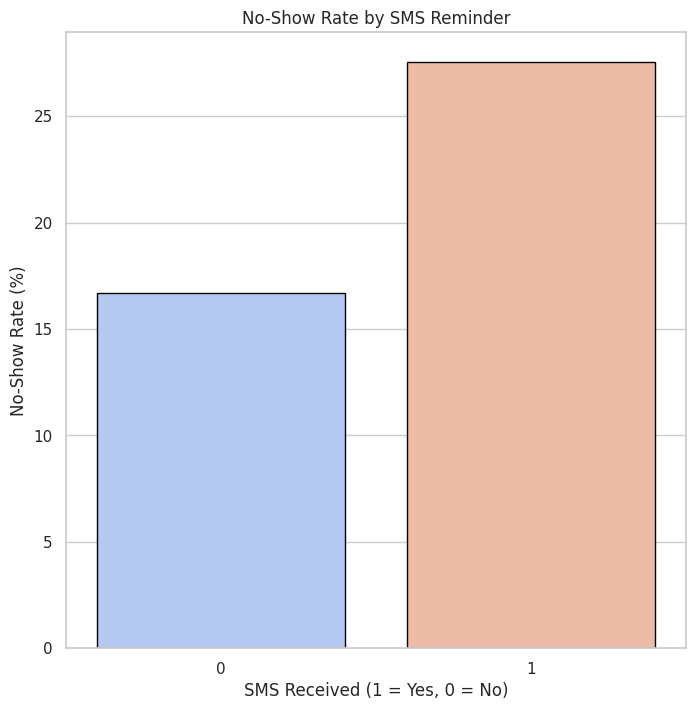

In [23]:
# Group by SMS_received and calculate the no-show rate
no_show_by_sms = df.groupby('SMS_received')['No_show'].mean() * 100

# Reset index for plotting
no_show_by_sms = no_show_by_sms.reset_index()

# Plot the no-show rate
plt.figure(figsize=(8, 8))
sns.barplot(x='SMS_received', y='No_show', data=no_show_by_sms, palette="coolwarm", edgecolor='black', hue='SMS_received', legend=False)
plt.title("No-Show Rate by SMS Reminder")
plt.xlabel("SMS Received (1 = Yes, 0 = No)")
plt.ylabel("No-Show Rate (%)")
plt.show()

#6.15 Corelation Between features

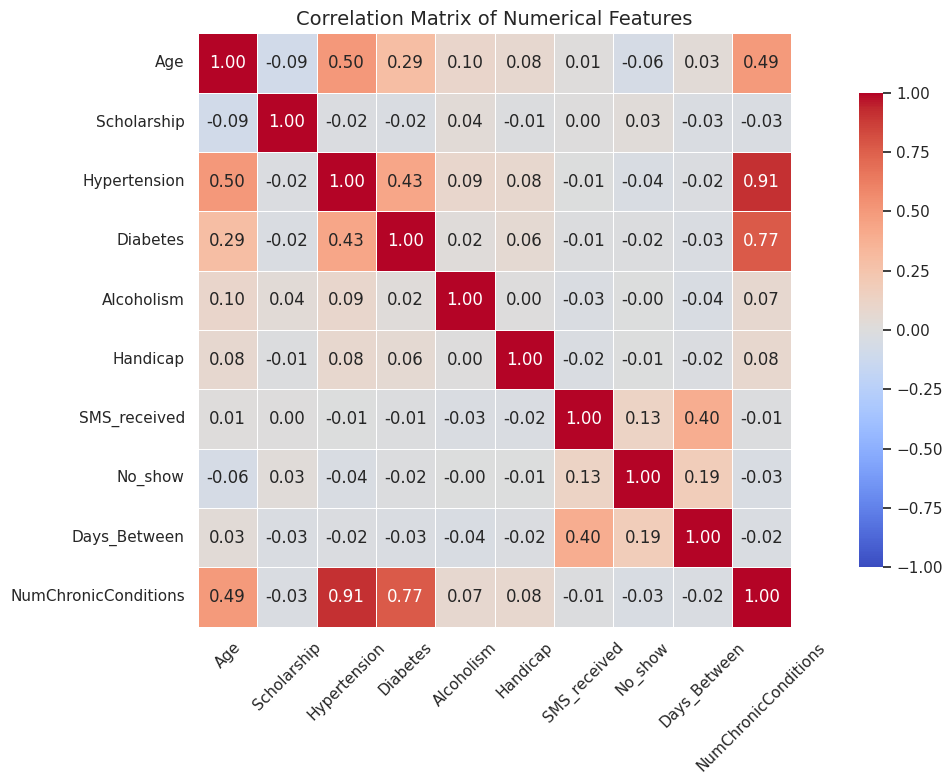

In [24]:
# Corelation Between features

# Select only numeric columns for correlation analysis
numeric_cols = [
    'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
    'Handicap', 'SMS_received', 'No_show', 'Days_Between', 'NumChronicConditions'
]

# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()